# 机器学习基础

## 有监督模型

根据有标注信息的数据集进行推断预测结果

In [1]:
import numpy as np

In [2]:
data_x = np.linspace(0,10,30)

In [3]:
data_y = data_x*3 + 7 + np.random.normal(0,1,30)#np.random_normal是用来增加噪声

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

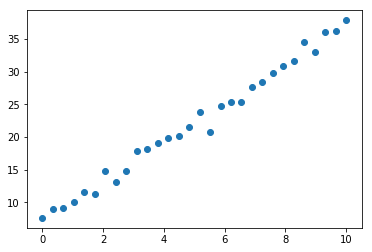

In [5]:
plt.scatter(data_x,data_y)

## 拟合一条直线

y = w*x+b

* 1.定义参数
* 2.输入训练数据
* 3.执行推断
* 4.计算损失
* 5.训练模型（循环跌打，减少损失）
* 6.评估模型

In [10]:
import tensorflow as tf

In [11]:
w = tf.Variable(1.,name='quanzhong')
b = tf.Variable(0.,name='pianzhi')#1.默认成了float32

设置占位符

In [12]:
x = tf.placeholder(tf.float32,shape=None)#形状可以为任何值，[None]长度任意
y = tf.placeholder(tf.float32,shape=[None])

In [13]:
pred = tf.multiply(x,w) + b

## 损失函数

点和直线的平方差，然后计算一个累加值作为标准

In [14]:
loss = tf.reduce_sum(tf.squared_difference(pred,y))#点和直线的平方差，然后计算一个累加值作为标准

## 梯度下降法：让loss下降到最低

求极值的方法，寻找最小的loss

下降太快可能跳过极值，下降太慢时间太长

** GradientDescentOptimizer梯度下降优化算法 **

In [18]:
learn_rate = 0.0001#学习率
train_step = tf.train.GradientDescentOptimizer(learn_rate).minimize(loss)

In [19]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())#初始化一个变量

In [20]:
for i in range(10000):
    sess.run(train_step,feed_dict={x:data_x,y:data_y})
    if i%1000 == 0:
        print(sess.run([loss,w,b],feed_dict={x:data_x,y:data_y}))#每隔1000步打印，学习率太快会出现Nan值

[6347.5967, 1.6204259, 0.10278133]
[42.935287, 3.2059157, 5.7321558]
[27.478939, 3.0384302, 6.8593631]
[26.773766, 3.0026569, 7.1001267]
[26.741594, 2.9950159, 7.1515512]
[26.740124, 2.9933836, 7.1625352]
[26.740063, 2.9930363, 7.1648722]
[26.740055, 2.9929643, 7.1653619]
[26.740055, 2.9929643, 7.1653619]
[26.740055, 2.9929643, 7.1653619]


结果

In [21]:
sess.run(w*12+b)

43.080936